# Wrangling Data Project

### Table of Contents

* [Gather data](#gatherdata)
* [Assess data](#assessdata)
* [Clean data](#cleandata)
* [Store data](#storedata)
* [Analyze and visualize data](#analyze)


In [1]:
import tweepy
import pandas as pd
import requests
import numpy as np

# Gather data <a class="anchor" id="gatherdata"></a>

#### Use Pandas library to download WeRateDogs archive data

In [2]:
# Create dataframe from provided twitter-archive-enhanced.csv
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

#### Use Request library to download tweet image prediction

In [3]:
# Download tweet image prediction data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save HTML to file
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)
    
# Create dataframe from image_predictions.tsv 
image_predictions = pd.read_csv('image_predictions.tsv', delimiter='\t')

#### Use Tweepy library to query additional data via Twitter API

In [4]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, parser=tweepy.parsers.JSONParser())

In [6]:
tweet_ids = twitter_archive['tweet_id']

In [7]:
def get_tweets(tweet_ids):
    tweets = []
    notfound_tweets = []

    for id in tweet_ids :   
        try:
            tweets.append(api.get_status(id))
        except:
            notfound_tweets.append(id)

In [8]:
import json 

def write_file(tweets):
    with open("file.json", 'w') as j:
        json.dump(tweets, j)

In [9]:
with open('file.json', 'r') as f:
    tweet_data = json.load(f)

In [10]:
rows = []
for i in range(len(tweet_data)):
    id = tweet_data[i]['id']
    retweet_count = tweet_data[i]['retweet_count']
    favorite_count = tweet_data[i]['favorite_count']
    rows.append([id, retweet_count, favorite_count])
    
        
tweet_df = pd.DataFrame(rows, columns = ['id', 'retweet_count', 'favorite_count'])

# Assess Data<a class="anchor" id="assessdata"></a>

### Visual

In [11]:
tweet_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,7136,34349
1,892177421306343426,5373,29780
2,891815181378084864,3537,22419
3,891689557279858688,7337,37534
4,891327558926688256,7883,35850


In [12]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2328 non-null   int64
 1   retweet_count   2328 non-null   int64
 2   favorite_count  2328 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


> **Issue observed**: 'id' column should be type object and changed to 'tweet_id'

In [13]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2207,668627278264475648,NaN,NaN,2015-11-23 03:09:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timofy. He's a pilot for Southwest. It...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668627278...,9,10,Timofy,None,None,None,None
1669,682429480204398592,NaN,NaN,2015-12-31 05:14:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I know we joke around on here, but this is get...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/682429480...,8,10,None,None,None,None,None
333,832757312314028032,NaN,NaN,2017-02-18 01:03:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Willow. She's the official strawberry ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832757312...,13,10,Willow,None,None,None,None
1353,703769065844768768,NaN,NaN,2016-02-28 02:29:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're trying to watch your favorite tv s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703769065...,10,10,None,None,None,None,None
1680,682003177596559360,NaN,NaN,2015-12-30 01:00:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Wrinkly as hell. Weird segmen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682003177...,5,10,None,None,None,None,None


In [14]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
denominators = twitter_archive.query('rating_denominator != 10')
denominators.count()

tweet_id                      23
in_reply_to_status_id          5
in_reply_to_user_id            5
timestamp                     23
source                        23
text                          23
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                 19
rating_numerator              23
rating_denominator            23
name                          23
doggo                         23
floofer                       23
pupper                        23
puppo                         23
dtype: int64

In [16]:
for i in range(len(twitter_archive)):
    if twitter_archive.loc[i]['rating_denominator'] > 10:
        print('ID: {}'.format(twitter_archive.loc[i]['tweet_id']))
        print('Tweet:{}'.format(twitter_archive.loc[i]['text']))

ID: 832088576586297345
Tweet:@docmisterio account started on 11/15/15
ID: 820690176645140481
Tweet:The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
ID: 775096608509886464
Tweet:RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
ID: 758467244762497024
Tweet:Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
ID: 740373189193256964
Tweet:After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
ID: 731156023742988288
Tweet:Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
ID: 722974582966214656
Tweet:Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
ID: 716439118184652801
Tweet:This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Am

> **Issues observed**: 
> * Some of the tweets are replies or retweeted from other users and should therefore be dropped
> * 'tweet_id' column should be object type 
> * 'timestamp' should be datetime type
> * Dog stages (doggo, floofer, pupper, or puppo) should be stored in a single column 'dog_stages'
> * Tweets with IDs 682808988178739200 and 686035780142297088 do not appear include ratings and should be dropped.
> * There are several ratings with denominators not equal to 10; the following ID's were incorrectly extracted: 775096608509886464, 716439118184652801, 682962037429899265, 722974582966214656.

In [17]:
# Check for rows with more than one dog stage
multiple_stages = []

for i in range(len(twitter_archive)):
    stage_count = 0
    if twitter_archive.doggo[i] == 'doggo':
        stage_count += 1
    if twitter_archive.floofer[i] == 'floofer':
        stage_count += 1
    if twitter_archive.pupper[i] == 'pupper':
        stage_count += 1
    if twitter_archive.puppo[i] == 'puppo':
        stage_count += 1
    if stage_count > 1:
        multiple_stages.append(twitter_archive.tweet_id[i])

print(multiple_stages)
print(len(multiple_stages))

[855851453814013952, 854010172552949760, 817777686764523521, 808106460588765185, 802265048156610565, 801115127852503040, 785639753186217984, 781308096455073793, 775898661951791106, 770093767776997377, 759793422261743616, 751583847268179968, 741067306818797568, 733109485275860992]
14


> **Issue observed**: Dogs should not be in multiple stages of development-- these rows should be dropped

In [18]:
tweet_df.duplicated().sum()

0

In [19]:
twitter_archive.duplicated().sum()

0

In [20]:
twitter_archive.name.value_counts().head(10)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Name: name, dtype: int64

> **Issues observed**: 
> * 55 dogs with name 'a' 
> * 745 dogs missing names

In [21]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> **Issue observed**: 'tweet_id' column should be type object

### Quality

*Quality issues include missing, duplicate, or incorrect data.*

Quality issues to be fixed:
* Some of the tweets are replies or retweeted from other users and should therefore be dropped
* 'id' column in tweet_df should be type object and changed to 'tweet_id'
* 'tweet_id' columns in twitter_archive and image_predictions should be object type
* 'timestamp' column in twitter_archive should be datetime type
* Tweets with IDs 682808988178739200 and 686035780142297088 do not include ratings and should be dropped.
* Tweets with the following IDs have incorrectly extracted ratings: 775096608509886464, 716439118184652801, 682962037429899265, 722974582966214656.
* 14 rows with dogs in multiple stages of development-- should be dropped
* 55 dogs with name 'a' in twitter_archive




### Tidiness

*Tidy data should have the following characteristics:*
* *Each variable forms a column*
* *Each observation forms a row*
* *Each type of observational unit forms a table*

Tidiness issues to be fixed:
* All data should be in one single table of observations because they each contain observation data about individual tweets
* Dog stages (doggo, floofer, pupper, or puppo) should be stored in a single column 'dog_stages'

# Clean Data<a class="anchor" id="cleandata"></a>

Before we begin cleaning the data, we first make a copy of original data to perform cleaning on.

In [23]:
# Copy each dataframe into a clean version
archive_clean = twitter_archive
images_clean = image_predictions
counts_clean = tweet_df

## Quality

### Fix inappropriate data types.

There are several instances of columns being the incorrect data type.
* 'id' column in tweet_df should be type object
* 'id' column in tweet_df should be changed to 'tweet_id'
* 'tweet_id' columns in twitter_archive and image_predictions should be object type
* 'timestamp' column in twitter_archive should be datetime type

In [24]:
# Correct the tweet_id columns for each dataframe
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(object)
images_clean['tweet_id'] = images_clean['tweet_id'].astype(object)

In [25]:
# Correct the timestamp column
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'], utc=False)

In [26]:
# Test archive_clean for correct data types
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [27]:
# Test images_clean for correct datatype for the tweet_id column
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [28]:
# Correct and rename 'id' column
counts_clean.rename(columns = {'id':'tweet_id'}, inplace=True)
counts_clean['tweet_id'] = counts_clean['tweet_id'].astype(object)

In [29]:
# Test counts_clean for correct datatype and label for the tweet_id column
counts_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2328 non-null   object
 1   retweet_count   2328 non-null   int64 
 2   favorite_count  2328 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


    
  

### Drop inaccurate/misleading data
* Drop all the rows that are retweets or replies to prevent them from skewing the data.
* Drop rows in which dogs are labeled at multiple stages of development.
* Tweets with IDs 682808988178739200 and 686035780142297088 do not include ratings and should be dropped.

#### Drop all the rows that are retweets.

In [30]:
# Save only rows that are not retweets or replies.
archive_clean = archive_clean[(archive_clean.retweeted_status_id.isnull()) 
                              & (archive_clean.in_reply_to_status_id.isnull())]

# Test that no retweets or replies are remaining.
print(archive_clean.retweeted_status_id.notnull().sum())
print(archive_clean.in_reply_to_status_id.notnull().sum())

0
0


In [31]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

In [32]:
# Drop column with retweet or reply stats.
archive_clean.drop(labels = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                             'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

#### Drop all the rows where dog is labeled at multiple stages of development.

In [34]:
# Drop rows that where dog is given more than one stage of development
mult = archive_clean[archive_clean.tweet_id.isin(multiple_stages)].index

archive_clean.drop(labels = mult, inplace=True)

In [35]:
# Test that no more rows contain more than one stage of development
archive_clean.tweet_id.isin(multiple_stages).sum()

0

In [36]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2086 non-null   object             
 1   timestamp           2086 non-null   datetime64[ns, UTC]
 2   source              2086 non-null   object             
 3   text                2086 non-null   object             
 4   expanded_urls       2083 non-null   object             
 5   rating_numerator    2086 non-null   int64              
 6   rating_denominator  2086 non-null   int64              
 7   name                2086 non-null   object             
 8   doggo               2086 non-null   object             
 9   floofer             2086 non-null   object             
 10  pupper              2086 non-null   object             
 11  puppo               2086 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

#### Drop rows with 'tweet_id' 682808988178739200 and 686035780142297088.


In [37]:
# Drop rows with no ratings.
not_ratings = archive_clean[archive_clean.tweet_id.isin([682808988178739200,686035780142297088])].index
archive_clean.drop(labels = not_ratings, inplace=True)

# Confirm that no rows contain these tweet IDs.
archive_clean.tweet_id.isin([682808988178739200,686035780142297088]).sum()

0

In [38]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2086 non-null   object             
 1   timestamp           2086 non-null   datetime64[ns, UTC]
 2   source              2086 non-null   object             
 3   text                2086 non-null   object             
 4   expanded_urls       2083 non-null   object             
 5   rating_numerator    2086 non-null   int64              
 6   rating_denominator  2086 non-null   int64              
 7   name                2086 non-null   object             
 8   doggo               2086 non-null   object             
 9   floofer             2086 non-null   object             
 10  pupper              2086 non-null   object             
 11  puppo               2086 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### Address inaccurate data
* Drop inaccurate ratings for tweets with following ID's: 775096608509886464, 716439118184652801, 682962037429899265, 722974582966214656.
* 55 dogs with name 'a' should be fixed.

In [39]:
# Drop the four tweets with inaccurate ratings
inaccurate = archive_clean[archive_clean.tweet_id.isin([775096608509886464, 716439118184652801, 
                                                        682962037429899265, 722974582966214656])].index
archive_clean.drop(labels = inaccurate, inplace=True)

In [40]:
# Confirm that the tweets are no longer in dataframe
archive_clean.tweet_id.isin([775096608509886464, 716439118184652801, 
                                                        682962037429899265, 722974582966214656]).sum()

0

In [41]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2083 non-null   object             
 1   timestamp           2083 non-null   datetime64[ns, UTC]
 2   source              2083 non-null   object             
 3   text                2083 non-null   object             
 4   expanded_urls       2080 non-null   object             
 5   rating_numerator    2083 non-null   int64              
 6   rating_denominator  2083 non-null   int64              
 7   name                2083 non-null   object             
 8   doggo               2083 non-null   object             
 9   floofer             2083 non-null   object             
 10  pupper              2083 non-null   object             
 11  puppo               2083 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### Tidiness Issues

* Dog stages (doggo, floofer, pupper, or puppo) should be stored in a single column 'dog_stages'

In [42]:
archive_clean['stages'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

/var/folders/gj/db2_21gj58xd9znlkd1wlqy80000gn/T/ipykernel_11276/1647963895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean['stages'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo


In [43]:
archive_clean.replace('NoneNoneNoneNone', 'NaN', inplace=True)
archive_clean.replace('doggoNoneNoneNone', 'doggo', inplace=True)
archive_clean.replace('NoneNonepupperNone', 'pupper', inplace=True)
archive_clean.replace('NoneNoneNonepuppo', 'puppo', inplace=True)
archive_clean.replace('NoneflooferNoneNone', 'floofer', inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [44]:
archive_clean.stages.unique()

array(['NaN', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [45]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2083 non-null   int64              
 1   timestamp           2083 non-null   datetime64[ns, UTC]
 2   source              2083 non-null   object             
 3   text                2083 non-null   object             
 4   expanded_urls       2080 non-null   object             
 5   rating_numerator    2083 non-null   int64              
 6   rating_denominator  2083 non-null   int64              
 7   name                2083 non-null   object             
 8   doggo               2083 non-null   object             
 9   floofer             2083 non-null   object             
 10  pupper              2083 non-null   object             
 11  puppo               2083 non-null   object             
 12  stages              2083 non-null 

In [46]:
archive_clean.drop(labels =['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [47]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


* All data should be in one single table of observations

In [48]:
images_and_archive = archive_clean.merge(images_clean, how='outer', on='tweet_id')
twitter_archive_master = images_and_archive.merge(counts_clean, how='outer', on='tweet_id')

In [49]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3062 entries, 0 to 3061
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            3062 non-null   object             
 1   timestamp           2083 non-null   datetime64[ns, UTC]
 2   source              2083 non-null   object             
 3   text                2083 non-null   object             
 4   expanded_urls       2080 non-null   object             
 5   rating_numerator    2083 non-null   float64            
 6   rating_denominator  2083 non-null   float64            
 7   name                2083 non-null   object             
 8   stages              2083 non-null   object             
 9   jpg_url             2075 non-null   object             
 10  img_num             2075 non-null   float64            
 11  p1                  2075 non-null   object             
 12  p1_conf             2075 non-null 

# Store Data<a class="anchor" id="storedata"></a>

In [50]:
# Save data to a csv file'twitter_archive_master.csv'
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

# Analyze and Visualize Data<a class="anchor" id="analyze"></a>

### Insights
* The most common dog breed identified was golden retrievers, followed by labrador retrievers. 
* Tweets with golden retrievers received the most favorites as compared to labrador retrievers, but labrador retrievers received higher average ratings.
* The majority of dogs received ratings between 10 and 14, with the overwhelming majority of ratings out of 10.
* On average, tweets received significantly higher favorites than retweets. However, 161 tweets received no favorites while each tweet received at least one retweet. There was a strong positive correlation seen between retweets and favorites.

In [51]:
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [52]:
# Create list of most common dog breeds.
x = twitter_archive_master['p1'].value_counts().head(21)

# Drop web_site and seat_belt (not dog breeds)
x.drop(['web_site','seat_belt'], inplace=True)

# Reformat the names of each dog breed
x.rename({'golden_retriever':'Golden Retriever', 'Labrador_retriever':'Labrador Retriever', 'pug':'Pug', 
          'chow':'Chow', 'toy_poodle':'Toy Poodle', 'malamute':'Malamute','cocker_spaniel':'Cocker Spaniel', 
          'French_bulldog':'French Belldog', 'miniature_pinscher':'Miniature Pinscher', 'Chesapeake_Bay_retriever':
          'Chesapeake Bay Retriever', 'German_shepherd':'German Shepherd', 'Siberian_husky':'Siberian Husky', 
          'Staffordshire_bullterrier': 'Staffordshire Bull Terrier', 'Shetland_sheepdog':'Shetland Sheep Dog'}, inplace=True)

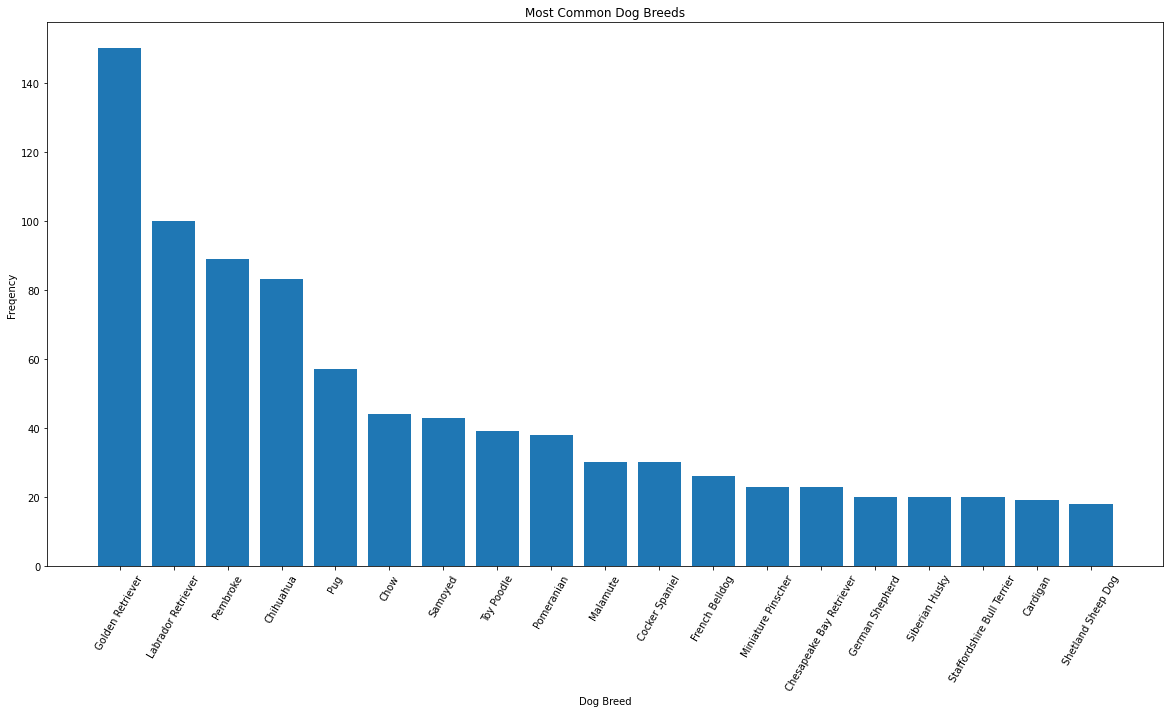

In [53]:
# Create bar chart of most common dog breeds.
fig = plt.figure(figsize=[20,10])
plt.bar(x.index, height=x)
plt.xticks(rotation=60)
plt.xlabel('Dog Breed')
plt.ylabel('Freqency')
plt.title('Most Common Dog Breeds');
fig.savefig('mostcommonbreeds.png');

In [54]:
twitter_archive_master.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2083.000000,2083.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03,2328.000000,2328.000000
mean,12.182429,10.427268,1.203855,0.594548,1.345886e-01,6.032417e-02,2514.069588,7164.882732
std,40.491094,6.607339,0.561875,0.271174,1.006657e-01,5.090593e-02,4257.995369,11131.615808
min,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,1.000000,0.000000
25%,10.000000,10.000000,1.000000,0.364412,5.388625e-02,1.622240e-02,506.000000,1243.750000
50%,11.000000,10.000000,1.000000,0.588230,1.181810e-01,4.944380e-02,1170.000000,3096.500000
75%,12.000000,10.000000,1.000000,0.843855,1.955655e-01,9.180755e-02,2911.500000,8744.750000
max,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,72074.000000,147086.000000


In [55]:
twitter_archive_master.favorite_count.value_counts().head()

0.0       161
388.0       4
2245.0      3
1201.0      3
3839.0      3
Name: favorite_count, dtype: int64

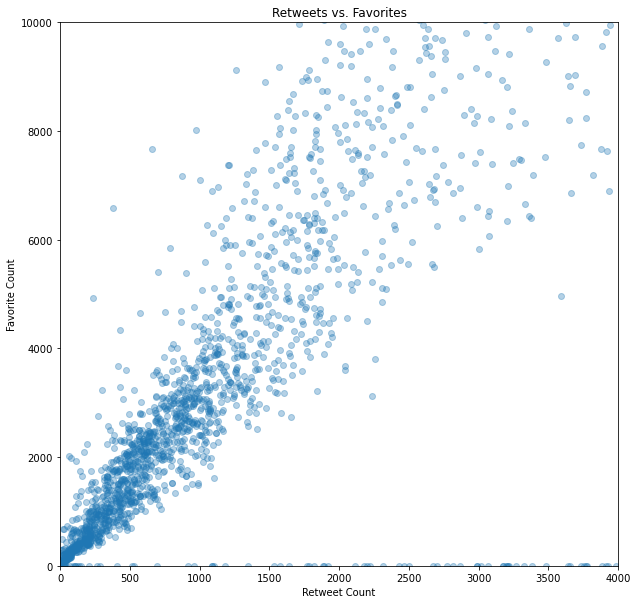

In [56]:
# Visualize relationship between retweets and favorites.
fig = plt.figure(figsize=[10,10])
plt.scatter(data=twitter_archive_master, x='retweet_count', y='favorite_count', alpha=1/3)
plt.xlim(0,4000)
plt.ylim(0,10000)
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.title('Retweets vs. Favorites')
fig.savefig('retweetsvfaves.png');

In [57]:
# Create separate dataframes with just golden and labrador retrievers
golden_df = twitter_archive_master[twitter_archive_master['p1'] == 'golden_retriever']
lab_df = twitter_archive_master[twitter_archive_master['p1'] == 'Labrador_retriever']

In [58]:
# Find average favorite count for each dataframe
golden_favorites = golden_df.favorite_count.mean()
lab_favorites = lab_df.favorite_count.mean()
all_favorites = twitter_archive_master.favorite_count.mean()

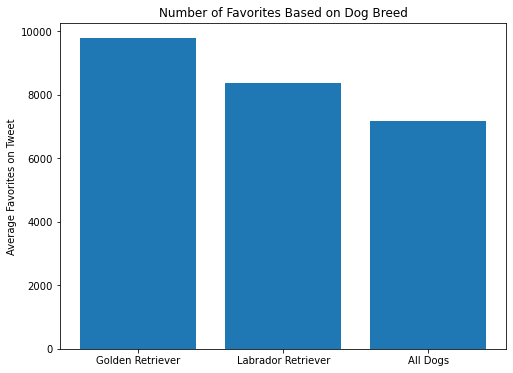

In [59]:
# Create visual to compare the average favorite counts of most popular dog breeds vs. all 
fig = plt.figure(figsize=[8,6])
plt.bar(x=['Golden Retriever', 'Labrador Retriever', 'All Dogs'], height = [golden_favorites, lab_favorites, all_favorites])
plt.ylabel('Average Favorites on Tweet')
plt.title('Number of Favorites Based on Dog Breed')
fig.savefig('favoritesbybreed.png');

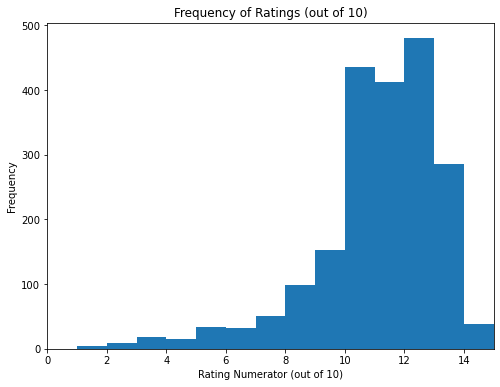

In [60]:
# Visualize frequency of each rating.
fig = plt.figure(figsize=[8,6])
plt.hist(data=twitter_archive_master, x='rating_numerator', bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]);
plt.xlim(0,15)
plt.xlabel('Rating Numerator (out of 10)')
plt.ylabel('Frequency')
plt.title('Frequency of Ratings (out of 10)')
fig.savefig('ratingsfrequency.png');

In [61]:
# Find average rating for each dataframe
golden_ratings = golden_df.rating_numerator.mean()
lab_ratings = lab_df.rating_numerator.mean()
all_ratings = twitter_archive_master.rating_numerator.mean()

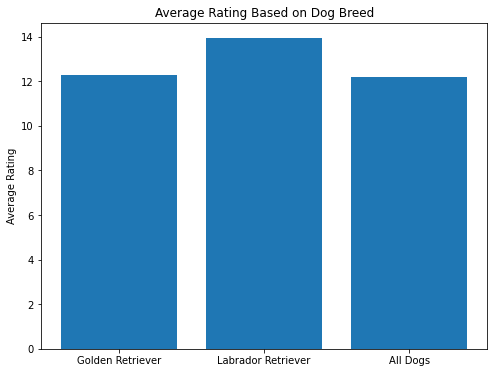

In [62]:
# Create visual to compare the average rating of most popular dog breeds vs. all 
fig = plt.figure(figsize=[8,6])
plt.bar(x=['Golden Retriever', 'Labrador Retriever', 'All Dogs'], height = [golden_ratings, lab_ratings, all_ratings])
plt.ylabel('Average Rating')
plt.title('Average Rating Based on Dog Breed')
fig.savefig('ratingbybreed.png');

## Sources

* https://stackoverflow.com/questions/62917882/convert-datetime64ns-utc-pandas-column-to-datetime

* https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/#pandas-drop-cheatsheet

* https://stackoverflow.com/questions/48614158/read-json-file-as-pandas-dataframe

* https://stackoverflow.com/questions/16573332/jsondecodeerror-expecting-value-line-1-column-1-char-0

* https://stackoverflow.com/questions/3768895/how-to-make-a-class-json-serializable